In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
mpl.rc('font',family = 'Malgun Gothic')
mpl.rcParams['axes.unicode_minus'] = False   
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["figure.figsize"] = (15,5)
plt.rcParams["font.size"] = 15
%matplotlib inline

In [2]:
df = pd.read_csv('cafe_2year.csv')
df = df.iloc[2::3,:]
df.columns = ['년월','카페 수']
df

,년월,카페 수
2,201712,76923
5,201803,80719
8,201806,81248
11,201809,88742
14,201812,95650
17,201903,97415
20,201906,98217
23,201909,98779


In [3]:
df['카페 수'].max(), df['카페 수'].min()

(98779, 76923)

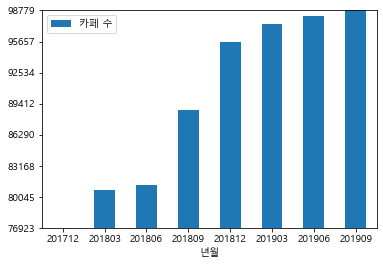

In [4]:
df.plot.bar(x='년월',y='카페 수',rot=0)
plt.ylim(df['카페 수'].min(),df['카페 수'].max())
plt.yticks(np.linspace(df['카페 수'].min(), df['카페 수'].max(), 8))
plt.show()

In [5]:
df = pd.read_csv('doctor_2019.csv',skiprows=[0],
                names=['지역','병원명','일반의','인턴','레지던트','전문의'])
df

,지역,병원명,일반의,인턴,레지던트,전문의
0,인천,가톨릭대학교인천성모병원,1,22,68,201
1,서울,강북삼성병원,6,28,137,204
2,서울,건국대학교병원,1,37,164,225
3,대구,경북대학교병원,5,77,209,225
4,경남,경상대학교병원,1,35,114,182
...,...,...,...,...,...,...
350,서울,홍익병원,1,4,14,55
351,강원,홍천아산병원,1,0,0,10
352,경기,효산의료재단 안양샘병원,7,5,17,86
353,경기,효산의료재단 지샘병원,2,0,2,72


In [6]:
df1 = df.loc[:,['지역','일반의','인턴','레지던트','전문의']]
df1

,지역,일반의,인턴,레지던트,전문의
0,인천,1,22,68,201
1,서울,6,28,137,204
2,서울,1,37,164,225
3,대구,5,77,209,225
4,경남,1,35,114,182
...,...,...,...,...,...
350,서울,1,4,14,55
351,강원,1,0,0,10
352,경기,7,5,17,86
353,경기,2,0,2,72


In [42]:
df2 = df1.groupby('지역').sum()
df2 = df2.loc[['서울','부산','대구','인천','대전','광주','울산'],:]
df2

,일반의,인턴,레지던트,전문의
지역,,,,
서울,162,1196,4757,9375
부산,58,197,785,2211
대구,27,215,712,1436
인천,47,138,444,1518
대전,25,142,425,1006
광주,16,102,356,1006
울산,19,23,104,467


In [43]:
df2.to_csv('doctor3.csv',mode='w')

In [44]:
df4 = pd.read_csv('doctor3.csv')
df4

,지역,일반의,인턴,레지던트,전문의
0,서울,162,1196,4757,9375
1,부산,58,197,785,2211
2,대구,27,215,712,1436
3,인천,47,138,444,1518
4,대전,25,142,425,1006
5,광주,16,102,356,1006
6,울산,19,23,104,467


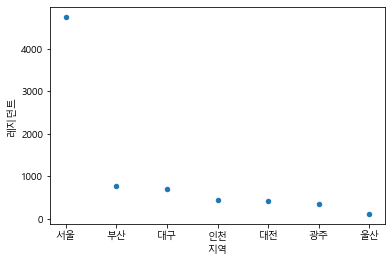

In [45]:
df4.plot(kind = 'scatter', x='지역',y='레지던트')
plt.show()

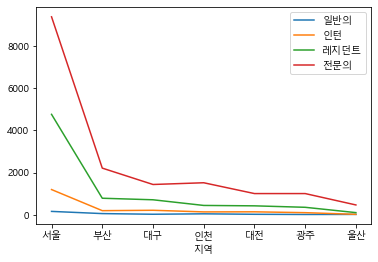

In [46]:
a = df2.plot()

In [54]:

df3 = df4.loc[0,:].value_counts()
df3.set_index['서울']
df3.plot.pie(autopct='%.2f%%')

AttributeError: 'Series' object has no attribute 'set_index'

In [50]:
df4.loc[0,:]

지역        서울
일반의      162
인턴      1196
레지던트    4757
전문의     9375
Name: 0, dtype: object